In [ ]:
#Classical Annealing Using the framework for Quantum annealing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import json
import ast

In [2]:
#Saves J values as a file with a name given.
def ParameterSaving(J,FileName):
     with open(FileName, 'w') as f:
        json.dump(J, f, indent=4)

In [3]:
#Reads J Value Datasets and saves the values as variable J
def CouplingSetReader(FileName):
    with open(FileName, 'r') as f:
        data = json.load(f)
    
    J = {ast.literal_eval(key): value for key, value in data.items()} # Convert string keys back to tuples
    
    return J

In [12]:
#Produces J as a dictionary which is the format DWave needs the values to be in.
def JSetup(NumberOfQubits):
    J = {} # Initialising the inter qubit coupling terms. A dictonary is used since its the format D-Wave uses. 

    for i in range(NumberOfQubits):
        for j in range(i+1, NumberOfQubits): # Two for loops are used and the second starts from the current value of the last so I dont double count.
            J[f"({i},{j})"] = random.uniform(-1, 1) # Picks a random number between -1 and 1, I previously made this just set every value to -1. 
    return J

In [14]:
#Uses JSetup and ParameterSaving, Builds J vales, saves them externally under the generated label
def ParameterSetup(NumberOfQubits, NumberOfSets):
    for i in range(NumberOfSets):
        J = JSetup(NumberOfQubits) # Generate J values using JSetup func.
        Label = f'NOQ = {NumberOfQubits}, J Value Set - {i}' #Just makes a new title for my DataSet
        ParameterSaving(J,Label)

In [56]:
#Takes in the state and its corresponding coupling terms and outputs the resultant cost function
def CostFunction(J, newState):
    TotalCost = 0
    NOQ = len(newState)
    for i in range(1,NOQ):
        for j in range(i+1,NOQ):
            cost = (J[(i,j)] * 0.5) * (1 - (newState[i] * newState[j]))
            TotalCost += cost
    return TotalCost

In [58]:
#Generates a new state, checks to see which is a better fit given the logic and then outputs the appropriate state and cost
def StateChecker(Temperature,State,CurrentCostOfState,J):
    NewState = State
    SelectSpin = random.randint(0,len(State)-1)
    NewState[SelectSpin] = -1 * NewState[SelectSpin]

    NewStateCost = CostFunction(J,NewState)
    Delta = NewStateCost - CurrentCostOfState

    if Delta >= 0:
        State = NewState
        return State, NewStateCost
    elif random.random() < np.exp(Delta/Temperature):
        State = NewState
        return State, NewStateCost
    else:
        State = State
        return State, CurrentCostOfState

In [60]:
def ChangeInCostCalculator(costArray,CheckingRange):
    ChangeInCost = 0
    EndOfArrayIndex = len(costArray) - 1
    HowFarBackWeLookBack = len(costArray) - CheckingRange
    for i in range(EndOfArrayIndex, HowFarBackWeLookBack,-1):
        ChangeInCost += abs(costArray[i] - costArray[i-1])
    return ChangeInCost    

In [62]:
def SimulatedAnnealer(J,State,Temperature,CoolingRate,Precision,CheckingRange):
    ChangeInCost = 0.25
    
    StartingCost = CostFunction(J,State)
    iteratingState, Cost = StateChecker(Temperature,State,StartingCost,J)
    xstep = []
    ycost = []
    TemperatureArray = []
    i = 0
    
    for n in range(0,CheckingRange):
        xstep.append(i) 
        ycost.append(Cost)
        TemperatureArray.append(Temperature)
    
        iteratingState, Cost = StateChecker(Temperature,iteratingState,Cost,J)
    
        i += 1
        Temperature *= CoolingRate

    while ChangeInCost > Precision:
        xstep.append(i) 
        ycost.append(Cost)
        TemperatureArray.append(Temperature)
    
        iteratingState, Cost = StateChecker(Temperature,iteratingState,Cost,J)
    
        i += 1
        Temperature *= CoolingRate
        ChangeInCost = ChangeInCostCalculator(ycost,CheckingRange)
        
    return xstep,ycost,TemperatureArray

In [104]:
#Parameters
NOQ = 50
ParameterSetup(NOQ, 1)
J = CouplingSetReader(f'NOQ = {NOQ}, J Value Set - 0')
#State = np.random.choice([1, -1], size=NOQ)
State = [1] * NOQ
StartingTemp = 100
CoolingRate = 0.999
Precision = 0.01
CheckingRange = 250

Final Value is,
1.2983582916477858


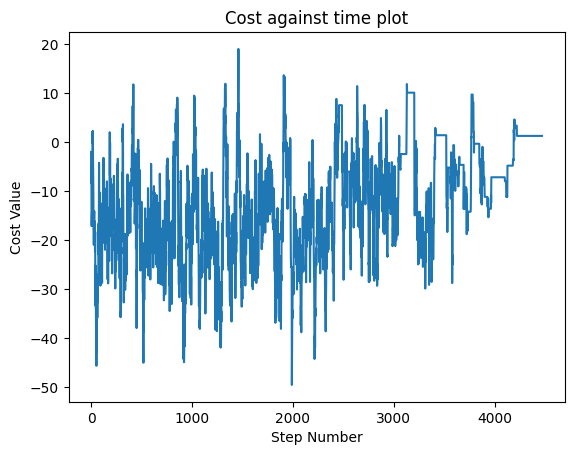

In [106]:
x,y,TemperatureArray = SimulatedAnnealer(J,State,StartingTemp,CoolingRate,Precision,CheckingRange)

plt.plot(x,y)
plt.title("Cost against time plot")
plt.xlabel("Step Number")
plt.ylabel("Cost Value")
print('Final Value is,')
print(y[len(y)-1])

Text(0, 0.5, 'Temperature')

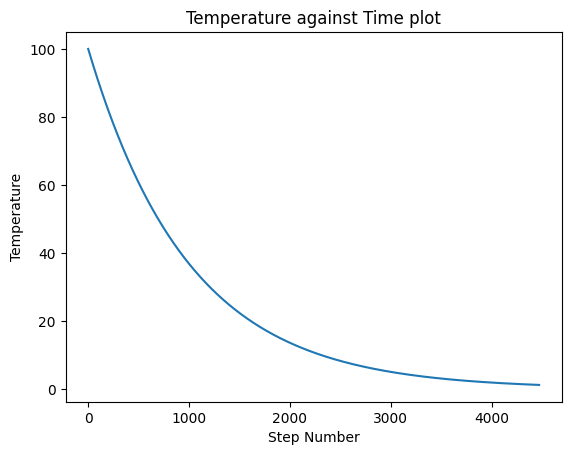

In [108]:
plt.plot(x,TemperatureArray)
plt.title("Temperature against Time plot")
plt.xlabel("Step Number")
plt.ylabel("Temperature")